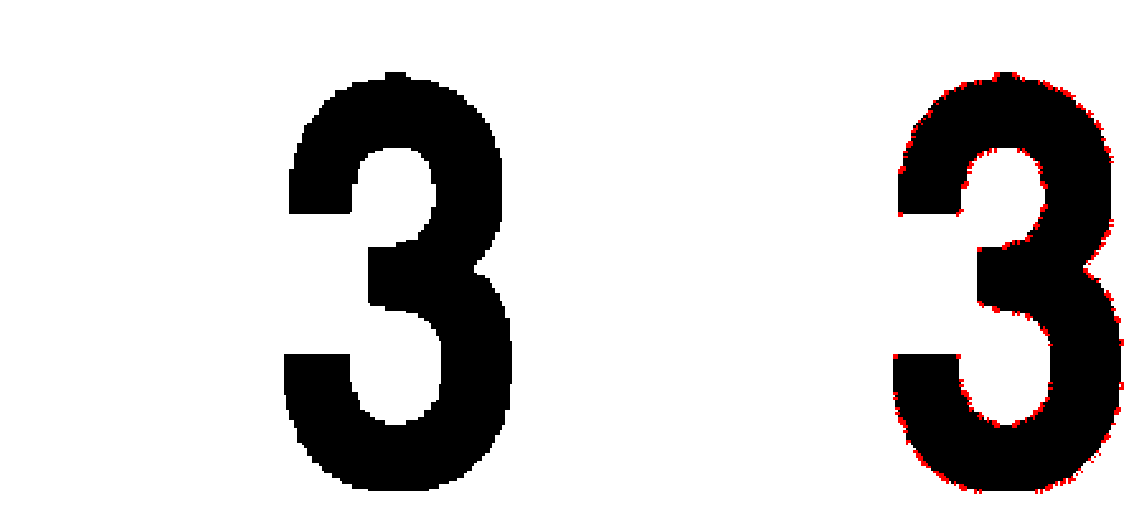

In [62]:
# 코너 추출 
import cv2

import numpy as np

import matplotlib.pyplot as plt



img = cv2.imread('test4.png') # 결과를 보기 쉽도록 체스판 그림을 사용했습니다.

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 꼭짓점 추출에는 흑백 그림이 필요합니다.

img_corner = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 나중에 꼭짓점을 여기에 표시합니다.



img_gray = np.float32(img_gray) # 넘파이(numpy)를 사용해서 자료형을 부동소수점으로 바꾸어주어야 합니다.

result = cv2.cornerHarris(img_gray, 2, 3, 0.04) # 2, 3, 0.04는 바꿀 수 있는 인자들입니다.

# print(result.shape)
"""
for i, data in enumerate(result):
    for j, d in enumerate(data):
        if d != 0:
            print(i, j)
"""         
#result = cv2.dilate(result, None, iterations=6) # 꼭짓점을 표시하기 위해 확장 (dilate) 연산을 합니다.
#print(result.shape)
img_corner[result>0.01*result.max()]=[255, 0, 0] # 꼭짓점이 빨간색 점으로 그림에 표시됩니다.


# 이 아래 부분은 그림을 화면에 출력하기 위한 부분으로, OpenCV 알고리즘과는 상관이 없습니다.
plt.figure(figsize=(20,17))

plt.subplot(1, 2, 1) # 1행 2열에서 1번째 열

plt.imshow(img_rgb)

plt.xticks([]) # x축 좌표 숨김

plt.yticks([]) # y축 좌표 숨김



plt.subplot(1, 2, 2) # 1행 2열에서 2번째 열

plt.imshow(img_corner)

plt.xticks([]) # x축 좌표 숨김

plt.yticks([]) # y축 좌표 숨김

#plt.subplot(2, 2, 3) # 1행 2열에서 2번째 열

#plt.imshow(result)
plt.show()

# 출처: https://crmn.tistory.com/57 [크롬망간이 글 쓰는 공간]

In [169]:
import numpy as np
import cv2
from os import listdir
import os
#thresh, im_bw = cv2.threshold(im2, 127, 255, cv2.THRESH_BINARY) #im_bw: binary image 
#im3, contours, hierarchy = cv2.findContours(im_bw,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) 
#cv2.drawContours(im2, contours, -1, (0,255,0), 3) 
#plt.imshow(im2,cmap='gray') #without the code, only an array displayed in the console 

def contour_approx(path):
    imgfile = './data/raw/' + path # './data/zoom/number_2/zoom_gl_5.png'
    img = cv2.imread(imgfile)
    img2 = img.copy()
    empty_img = np.zeros(img.shape) + 255
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, thr = cv2.threshold(img_gray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    cv2.drawContours(empty_img, contours[1], -1, (0, 255, 0), 3)
    
    #plt.imshow(empty_img)
    cv2.imwrite('./data/contour/' + path, empty_img)
    
if __name__ == '__main__':
    files = listdir('./data/raw')
    for file in files:
        contour_approx(file)
    
    

In [7]:
import numpy as np
import cv2

def contour_approx():
    imgfile = 'test0.png'
    img = cv2.imread(imgfile)
    img2 = img.copy()
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, thr = cv2.threshold(img_gray, 127, 255, 0)
    edge, contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, 
                                                 cv2.CHAIN_APPROX_SIMPLE)
    
    cnt = contours[0]
    
    hull = cv2.convexHull(cnt)
    cv2.drawContours(img, [hull], 0, (0, 0, 255), 2)
    
    hull = cv2.convexHull(cnt, returnPoints=False)
    defects = cv2.convexityDefects(cnt, hull)
    
    for i in range(defects.shape[0]):
        sp, ep, fp, dist = defects[i, 0]
        start = tuple(cnt[sp][0])
        end = tuple(cnt[ep][0])
        farthest = tuple(cnt[fp][0])
        
        cv2.circle(img, farthest, 5, (0, 255, 0), -1)
        
    plt.imshow(img)

if __name__ == '__main__':
    contour_approx()
    
    

AttributeError: 'NoneType' object has no attribute 'copy'

(1, 1, 3)


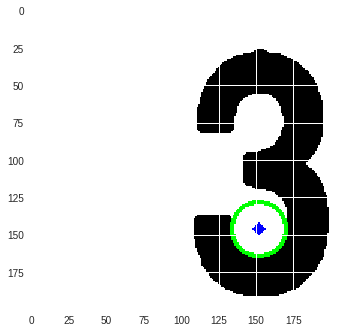

In [57]:
# 원 검출
# 출처 : https://webnautes.tistory.com/949
import numpy as np
import cv2 as cv

img = cv.imread('test4.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=25,minRadius=0,maxRadius=0)
print(circles.shape)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)

In [33]:
import cv2
import numpy as np

img = cv2.imread('1_궁.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
print(lines)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(img)

None


TypeError: ignored

In [34]:
import cv2
import numpy as np

img = cv2.imread('1_궁.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(img)

TypeError: ignored

(313, 313, 3)

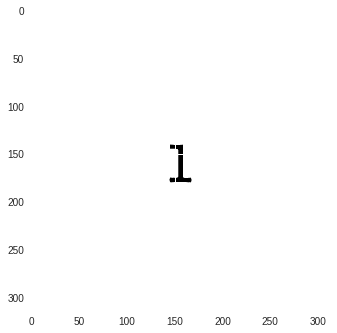

In [39]:
import numpy as np
import cv2

img = cv2.imread('1_궁.png')
plt.imshow(img)

img.shape

In [72]:
# 코너 추출 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize 
%matplotlib inline

# normalize(X, norm=’l2’, axis=1, copy=True, return_norm=False
                                
def corner_harris_feature_extraction(img_path):
    img = cv2.imread('./data/raw/' + img_path)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_corner = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ret, thr = cv2.threshold(img_gray, 127, 255, 0)
    
    img_line = np.zeros(img.shape) + 255.
    
    img_gray = np.float32(thr) 

    result = cv2.cornerHarris(img_gray, 2, 3, 0.04)
    
    result_norm = normalize(result.reshape(-1, 1))
    result_norm = result_norm.reshape(200, 200)
    
    img_corner[result>0.01*result.max()]=[255, 0, 0]
    
    img_line[result>0.001*result.max()]=[255, 0, 0]
    img_line[result<0.001*result.min()]=[255, 0, 0]
    print(result_norm.min(), result_norm.max())
    
    plt.figure(figsize=(20,17))
    #plt.imshow(img_line)
    cv2.imwrite('./data/corner/'+ img_path, img_line)

In [73]:
#corner_harris_feature_extraction('./data/raw/raw_ggd_0.png')
from os import listdir
files = listdir('./data/raw')
for file in files:
    corner_harris_feature_extraction(file)

-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too 

-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

<Figure size 1440x1224 with 0 Axes>

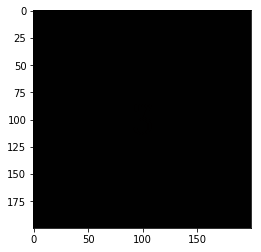

In [45]:
import cv2
import numpy as np

k = 3
img = cv2.imread('./data/raw/raw_gsc_3.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
empty_img = np.zeros(img.shape) + 255

i = 0
while i < 200 - k:
    j = 0
    while j < 200 - k:
        a = 0
        
        for k_width in range(k):
            for k_height in range(k):
                if img_gray[i + k_width, j + k_height] <= 128.:
                    a += 1
        
        if a >= 5:
            empty_img[i + int(k/2), j + int(k/2)] = [255, 0, 0]
            j += k - 1
        j += 1
    
    i += 1


plt.imshow(empty_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


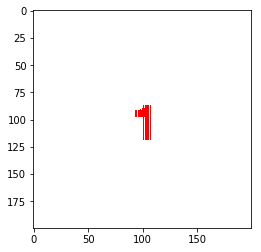

In [142]:
import cv2
import numpy as np

p1 = np.array([[255, 255, 255],
               [0, 0, 0],
               [255, 255, 255]])
p2 = np.array([[255, 0, 255],
               [255, 0, 255],
               [255, 0, 255]])
p3 = np.array([[0, 255, 255],
               [255, 0, 255],
               [255, 255, 0]])
p4 = np.array([[255, 255, 0],
               [255, 0, 255],
               [0, 255, 255]])

k = 3
img = cv2.imread('./data/raw/raw_ggd_1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret, thr = cv2.threshold(img_gray, 127, 255, 0)
empty_img = np.zeros(img.shape) + 255

i = 0
while i < 200 - k:
    j = 0
    while j < 200 - k:        
        a = thr[i:i+k, j:j+k] == p2
        
        if a.sum() != 6:
            empty_img[i + int(k/2), j + int(k/2)] = [255, 0, 0]
        j += 1
    i += 1


plt.imshow(empty_img)


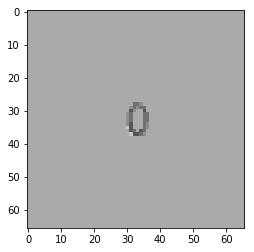

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

k = 3
p = np.zeros((k, k))
p1 = np.array([[0, 0, 0],
               [1, 1, 1],
               [0, 0, 0]]) * 255

p2 = np.array([[0, 1, 0],
               [0, 1, 0],
               [0, 1, 0]]) * 255

p3 = np.array([[1, 0, 0],
               [0, 1, 0],
               [0, 0, 1]]) * 255

p4 = np.array([[0, 0, 1],
               [0, 1, 0],
               [1, 0, 0]]) * 255

img = cv2.imread('./data/zoom/number_0/zoom_gsc_1.png')
img2 = img.copy()
img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
ret, thr = cv2.threshold(img_gray, 127, 255, 0)
length = int(img.shape[0] / k)
empty_img = np.uint8(np.zeros((length, length, 3)) + 255)

#print(img)
i = 0
b = set()
while i < length:
    j = 0
    while j < length:        
        
        a = np.sum((thr[k*i:k*i+k, k*j:k*j+k] == p4))
        a = int(255 - (a / float(k*k)) * 255)

        empty_img[i, j] = [a, a, a]
        j += 1
    i += 1

plt.imshow(empty_img)